In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

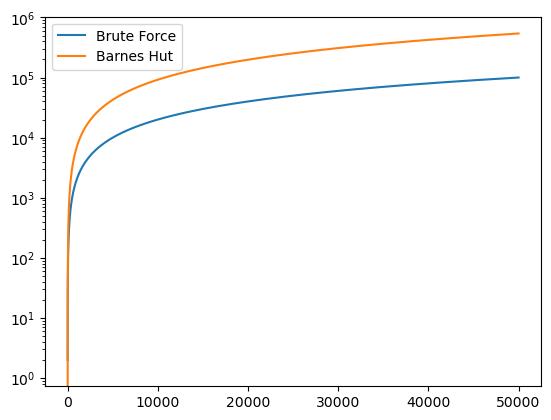

In [18]:
# Create a vector from 1 to 50000
x = np.arange(1, 50000 + 1)
y_bf = x*2
y_hu = x * np.log(x)

# Plot the data using matplotlib
plt.plot(x, y_bf, label='Brute Force')
plt.plot(x, y_hu, label='Barnes Hut')
# log scale y
plt.yscale('log')
plt.legend()
plt.show()

In [14]:
no_opt = pd.DataFrame(columns=['compute_force_particle', 'compute_force', 'insert_particle', 'max', 'move_all_particles', 'move_particle', 'compute_bh_force', 'get_octrant', 'clean_tree'],
                      index = [10000, 32768, 40000, 140005])

no_opt.loc[10000] = [55.68, 19.92, 16.86, 3.07, 3.07, 1.02, 0, 0, 0]
no_opt.loc[40000] = [58.24, 20.88, 7.00, 2.33, 2.08, 2.33, 2.20, 1.17, 1.69]
no_opt.loc[32768] = [54.02, 20.89, 11.29, 3.11, 0.66, 1.98, 1.79, 2.63, 1.04]
no_opt.loc[140005] = [59.36, 20.10, 9.58, 3.01, 1.21, 1.26, 2.30, 0.95, 0.83]

In [58]:
no_opt

,compute_force_particle,compute_force,insert_particle,max,move_all_particles,move_particle,compute_bh_force,get_octrant,clean_tree
10000,55.68,19.92,16.86,3.07,3.07,1.02,0,0,0
32768,54.02,20.89,11.29,3.11,0.66,1.98,1.79,2.63,1.04
40000,58.24,20.88,7.0,2.33,2.08,2.33,2.2,1.17,1.69
140005,59.36,20.1,9.58,3.01,1.21,1.26,2.3,0.95,0.83


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


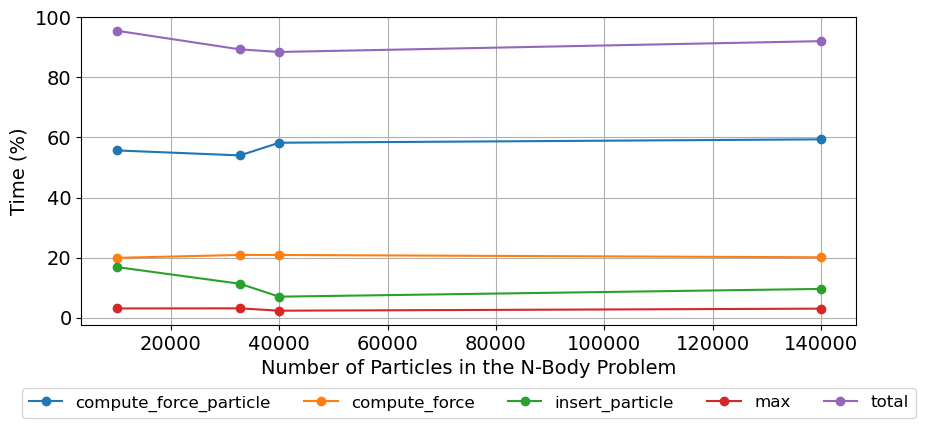

In [44]:
plt.figure(figsize=(10, 4))
for col in no_opt.columns[:4]:
    plt.plot(no_opt.index, no_opt[col].values, marker='o', linestyle='-', label=col)
plt.plot(no_opt.index, no_opt.iloc[:, :4].sum(axis=1).values, marker='o', linestyle='-', label='total')
plt.xlabel('Number of Particles in the N-Body Problem', fontsize=14)
plt.ylabel('Time (%)', fontsize=14)
plt.xticks(fontsize=14)  # Adjust the fontsize of x-axis tick labels
plt.yticks(fontsize=14)  # Adjust the fontsize of y-axis tick labels
plt.grid(True)

# Put the legend at the right, outside the plot
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.33), ncol=5, fontsize=12)
plt.savefig('performance_metrics.eps', format='eps', bbox_inches='tight')

plt.show()

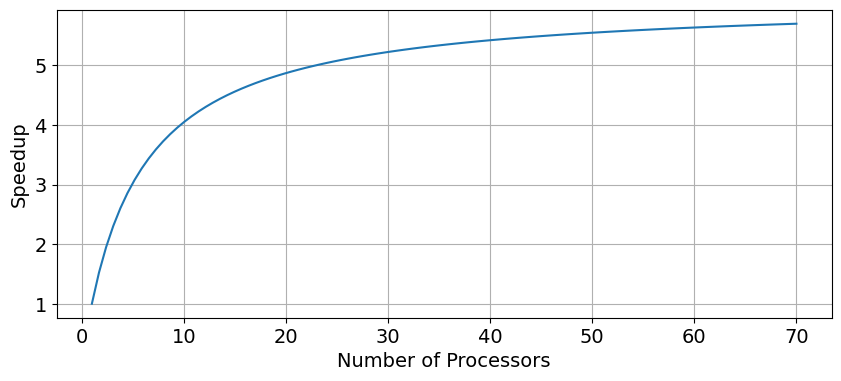

In [57]:
x_vals = np.linspace(1, 70, 100)
p = 0.8365
speedup = 1 / ((1 - p) + p / x_vals)

plt.figure(figsize=(10, 4))
plt.plot(x_vals, speedup, linestyle='-', label='Speedup')
plt.xlabel('Number of Processors', fontsize=14)
plt.ylabel('Speedup', fontsize=14)
plt.xticks(fontsize=14)  # Adjust the fontsize of x-axis tick labels
plt.yticks(fontsize=14)  # Adjust the fontsize of y-axis tick labels
plt.grid(True)

#save figure
plt.savefig('speedup.eps', format='eps', bbox_inches='tight')
plt.show()

In [76]:
int(np.linspace(10000, 140000, 14))

TypeError: only length-1 arrays can be converted to Python scalars

# Create Data with other sizes

In [77]:
# Path to the file
file_path = '../examples/cluster_LI.txt'
size = 10000

for size in np.linspace(10000, 140000, 14, dtype=int):
    data = []
    # Open the file and read line by line
    with open(file_path, 'r') as file:
        # Read the first line which contains the number of data lines
        num_lines = int(file.readline().strip())

        # Loop through the remaining lines
        for line in file:
            # Split each line by tab and convert each part to the appropriate type
            parts = line.strip().split('\t')
            data_row = [float(part) for part in parts]
            data.append(data_row)

    # Choose a subset of 10000 of the data points
    data_10k = data[:size]

    # Path for the new file to export the subset
    new_file_path = f'../examples/strong_scaling/subset_{size}.txt'

    # Write the subset of data to the new file
    with open(new_file_path, 'w') as new_file:
        # Write the number of data lines
        new_file.write(str(len(data_10k)) + '\n')

        # Write each data point
        for data_row in data_10k:
            line = '\t'.join(map(str, data_row))
            new_file.write(line + '\n')

In [65]:
# Re-creating the data processing and exporting steps, as the previous execution environment seems to have been reset.

# Since the original data is not available in this environment, I will simulate a similar dataset for demonstration.

import random

# Simulating a dataset similar to the described format
def simulate_data(num_rows, num_columns):
    return [[random.uniform(0, 1) for _ in range(num_columns)] for _ in range(num_rows)]

# Simulate the original data (assuming 50000 rows and 3 columns as an example)
original_data = simulate_data(50000, 3)

# Selecting the first 10000 data points
data_10k = original_data[:10000]

# Path for the new file to export the subset
new_file_path = 'cluster_LI_subset.txt'

# Write the subset of data to the new file
with open(new_file_path, 'w') as new_file:
    # Write the number of data lines
    new_file.write(str(len(data_10k)) + '\n')

    # Write each data point
    for data_row in data_10k:
        line = '\t'.join(map(str, data_row))
        new_file.write(line + '\n')

new_file_path


'cluster_LI_subset.txt'

# Runs

## MPI, -O3

In [79]:
mpi_o3_dict = {
    "10000": [1.140705, 0.736148, 0.543674, 0.514461, 0.500602, 1.162728],
    "20000": [2.131084, 1.352766, 1.092217, 1.030349, 0.878009, 1.531590],
    "30000": [4.792923, 2.924593, 2.096649, 2.001034, 1.628995, 2.117418],
    "40000": [6.892599, 4.232574, 2.952995, 2.677812, 2.222199, 2.658914],
    "50000": [9.201588, 5.607243, 4.154891, 3.427172, 2.956818, 3.170248],
    "60000": [12.544351, 7.560054, 5.297552, 4.468853, 4.161119, 3.974918],
    "70000": [14.710458, 9.029194, 6.306499, 5.140971, 4.303335, 4.562187],
    "80000": [17.370091, 10.406924, 7.478995, 6.100355, 5.651027, 5.332630],
    "90000": [21.384089, 12.967300, 9.080872, 7.196291, 6.673849, 6.038615],
    "100000": [22.658377, 13.757911, 9.884316, 7.787097, 7.224180, 6.719790],
    "110000": [26.534488, 16.072475, 11.248630, 9.021860, 8.096682, 7.565473],
    "120000": [29.284242, 17.899288, 12.391254, 9.849264, 8.922347, 8.336660],
    "130000": [32.487730, 19.955686, 13.529508, 10.881848, 9.193547, 9.286968],
    "140000": [37.317545, 22.544607, 15.361248, 11.963624, 10.191396, 9.881553]
}

# Convert the dictionary to a DataFrame
mpi_o3 = pd.DataFrame.from_dict(mpi_o3_dict, orient='index', columns=[1, 2, 4, 8, 16, 32])
mpi_o3.index.name = 'Particles'
mpi_o3.columns.name = 'Processes'
mpi_o3

Processes,1,2,4,8,16,32
Particles,,,,,,
10000,1.140705,0.736148,0.543674,0.514461,0.500602,1.162728
20000,2.131084,1.352766,1.092217,1.030349,0.878009,1.531590
30000,4.792923,2.924593,2.096649,2.001034,1.628995,2.117418
40000,6.892599,4.232574,2.952995,2.677812,2.222199,2.658914
50000,9.201588,5.607243,4.154891,3.427172,2.956818,3.170248
60000,12.544351,7.560054,5.297552,4.468853,4.161119,3.974918
70000,14.710458,9.029194,6.306499,5.140971,4.303335,4.562187
80000,17.370091,10.406924,7.478995,6.100355,5.651027,5.332630
90000,21.384089,12.967300,9.080872,7.196291,6.673849,6.038615


## MPI, -O0

In [80]:
mpi_o0_dict = {
    "10000": [2.440508, 1.457330, 1.004053, 0.836443, 0.763803, 1.438001],
    "20000": [4.425553, 2.721560, 2.016156, 1.655901, 1.514027, 2.033383],
    "30000": [9.734754, 5.714876, 3.898541, 3.095662, 2.732863, 2.920263],
    "40000": [13.741398, 8.122838, 5.608799, 4.304246, 3.613256, 3.924809],
    "50000": [18.180976, 10.897744, 7.140415, 5.635152, 4.664665, 4.823796],
    "60000": [24.507483, 13.948247, 9.222196, 7.204714, 6.310927, 6.072712],
    "70000": [28.366305, 16.947739, 11.070550, 8.509021, 7.506198, 6.912896],
    "80000": [33.214550, 19.521199, 13.159277, 10.205334, 8.675838, 8.020576],
    "90000": [41.153194, 24.171385, 15.986310, 11.928477, 9.759346, 9.449830],
    "100000": [43.032910, 25.301814, 16.927332, 12.932512, 10.859242, 10.437451],
    "110000": [50.317151, 29.644160, 19.644120, 14.968594, 12.347764, 11.720617],
    "120000": [54.902252, 32.216755, 21.591240, 16.367586, 13.391149, 12.810418],
    "130000": [61.618703, 35.347057, 23.460454, 17.806646, 15.057148, 14.249481],
    "140000": [72.209879, 40.965371, 26.860517, 19.912101, 16.762162, 15.524172]
}

# Convert the dictionary to a DataFrame
mpi_o0 = pd.DataFrame.from_dict(mpi_o0_dict, orient='index', columns=[1, 2, 4, 8, 16, 32])
mpi_o0.index.name = 'Particles'
mpi_o0.columns.name = 'Processes'
mpi_o0

Processes,1,2,4,8,16,32
Particles,,,,,,
10000,2.440508,1.457330,1.004053,0.836443,0.763803,1.438001
20000,4.425553,2.721560,2.016156,1.655901,1.514027,2.033383
30000,9.734754,5.714876,3.898541,3.095662,2.732863,2.920263
40000,13.741398,8.122838,5.608799,4.304246,3.613256,3.924809
50000,18.180976,10.897744,7.140415,5.635152,4.664665,4.823796
60000,24.507483,13.948247,9.222196,7.204714,6.310927,6.072712
70000,28.366305,16.947739,11.070550,8.509021,7.506198,6.912896
80000,33.214550,19.521199,13.159277,10.205334,8.675838,8.020576
90000,41.153194,24.171385,15.986310,11.928477,9.759346,9.449830
